# Scrapping New Domains Daily with Keyword 

Scrapping new domains from www.tastereports.com with a keyword and write them to a dataframe,

Virtualize the result with matplotlib

And save the result as a CSV file

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
df_domain_tot=pd.DataFrame()
df_bar=pd.DataFrame(columns = ["Day", "Total_Domain"])
df_bar_tot=pd.DataFrame()
start = datetime(2019,1,1)
finish = datetime.now()
totalday= finish-start
for i in range(totalday.days):  
    start_edit=start.strftime('%Y-%m-%d')
    url='https://tastereports.com/archives.html?type=added&stat_date={}&registrar_id=all&Submit=Go&keyword=adidas'.format(start_edit)
    #print(url)
    request = requests.get(url)
    soup = BeautifulSoup(request.content,'lxml')
    table = soup.find_all('table')[2] 
    df = pd.read_html(str(table))[0]
    df_domain = pd.DataFrame(df)
    df_domain.drop(0,inplace=True)    
    df_domain_tot=df_domain_tot.append(df_domain)
    print('The new domain in {} is: {}, Total domain number is: {}'.format(start_edit,(df_domain.shape[0]),(df_domain_tot.shape[0])))
    df_bar['Day'], df_bar["Total_Domain"] = [[start_edit], [df_domain.shape[0]]]
    df_bar_tot=df_bar_tot.append(df_bar)
    start += timedelta(days=1)
print('Finish')
df_domain_tot.columns = ['NaN','Domain','Registrar','Created','Dropped','Age']
df_domain_tot.drop('NaN',1,inplace=True)
df_domain_tot.head()    



The new domain in 2019-01-01 is: 0, Total domain number is: 0
The new domain in 2019-01-02 is: 0, Total domain number is: 0
The new domain in 2019-01-03 is: 0, Total domain number is: 0
The new domain in 2019-01-04 is: 0, Total domain number is: 0
The new domain in 2019-01-05 is: 0, Total domain number is: 0
The new domain in 2019-01-06 is: 0, Total domain number is: 0
The new domain in 2019-01-07 is: 0, Total domain number is: 0
The new domain in 2019-01-08 is: 0, Total domain number is: 0
The new domain in 2019-01-09 is: 0, Total domain number is: 0
The new domain in 2019-01-10 is: 0, Total domain number is: 0
The new domain in 2019-01-11 is: 0, Total domain number is: 0
The new domain in 2019-01-12 is: 0, Total domain number is: 0
The new domain in 2019-01-13 is: 0, Total domain number is: 0
The new domain in 2019-01-14 is: 0, Total domain number is: 0
The new domain in 2019-01-15 is: 0, Total domain number is: 0
The new domain in 2019-01-16 is: 0, Total domain number is: 0
The new 

The new domain in 2019-05-14 is: 0, Total domain number is: 0
The new domain in 2019-05-15 is: 0, Total domain number is: 0
The new domain in 2019-05-16 is: 0, Total domain number is: 0
The new domain in 2019-05-17 is: 0, Total domain number is: 0
The new domain in 2019-05-18 is: 0, Total domain number is: 0
The new domain in 2019-05-19 is: 0, Total domain number is: 0
The new domain in 2019-05-20 is: 0, Total domain number is: 0
The new domain in 2019-05-21 is: 0, Total domain number is: 0
The new domain in 2019-05-22 is: 0, Total domain number is: 0
The new domain in 2019-05-23 is: 0, Total domain number is: 0
The new domain in 2019-05-24 is: 0, Total domain number is: 0
The new domain in 2019-05-25 is: 0, Total domain number is: 0
The new domain in 2019-05-26 is: 0, Total domain number is: 0
The new domain in 2019-05-27 is: 0, Total domain number is: 0
The new domain in 2019-05-28 is: 0, Total domain number is: 0
The new domain in 2019-05-29 is: 0, Total domain number is: 0
The new 

,Domain,Registrar,Created,Dropped,Age
1,adidasmessi16ag.us,DOMAINMONSTER INC,2019-06-08,-,-
2,adidasoriginalzxflux.us,DOMAINMONSTER INC,2019-06-08,-,-
1,adidas-tmall.com,DOMAINMONSTER INC,2019-06-09,-,-
2,dissadidas.com,DOMAINMONSTER INC,2019-06-09,-,-
1,adidascopenhagen.com,DOMAINMONSTER INC,2019-06-10,-,-


In [4]:
df_domain_tot.to_csv('domain_list.csv')

In [5]:
df_bar_tot.head()

,Day,Total_Domain
0,2019-01-01,0
0,2019-01-02,0
0,2019-01-03,0
0,2019-01-04,0
0,2019-01-05,0


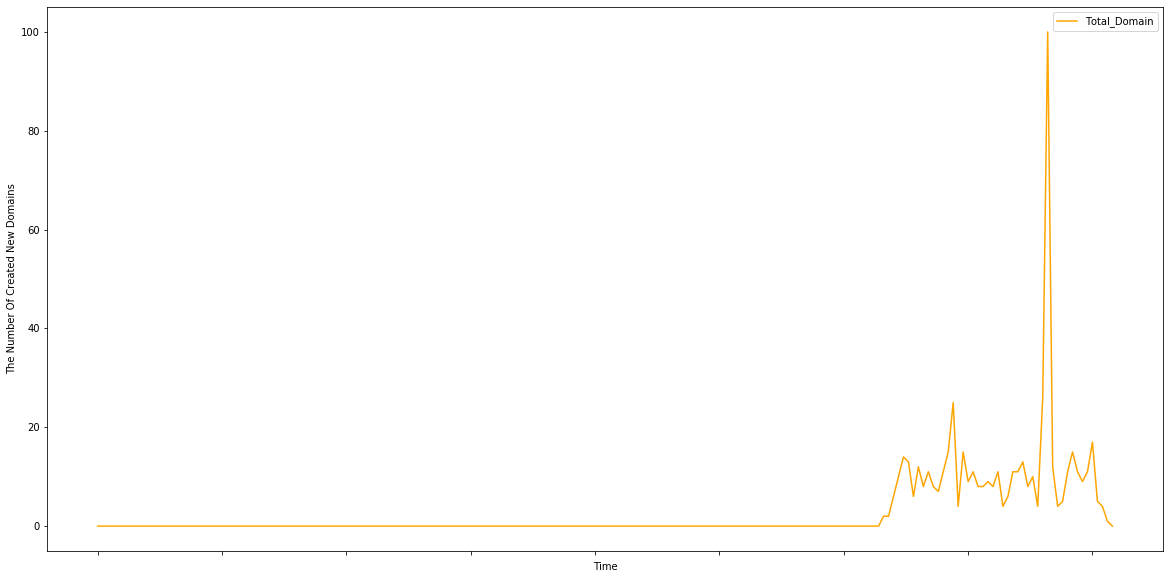

In [8]:
df_bar_tot.plot(x="Day", y="Total_Domain", color='orange',figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('The Number Of Created New Domains')
plt.show()

In [9]:
df_domain_tot.reset_index(drop=True)
df_domain_tot.head()

,Domain,Registrar,Created,Dropped,Age
1,adidasmessi16ag.us,DOMAINMONSTER INC,2019-06-08,-,-
2,adidasoriginalzxflux.us,DOMAINMONSTER INC,2019-06-08,-,-
1,adidas-tmall.com,DOMAINMONSTER INC,2019-06-09,-,-
2,dissadidas.com,DOMAINMONSTER INC,2019-06-09,-,-
1,adidascopenhagen.com,DOMAINMONSTER INC,2019-06-10,-,-
